In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Read in the spikeball csv
url = 'https://raw.githubusercontent.com/ishaandey/node/master/week-7/workshop/dt/spikeball.csv'
df = pd.read_csv(url)

In [3]:
# Take a look at the data
df

,weather,temp,friends_free,played_spikeball
0,Sunny,40,4,0
1,Sunny,70,1,0
2,Sunny,75,3,1
3,Partly Cloudy,55,4,1
4,Partly Cloudy,50,3,0
5,Cloudy,40,4,0
6,Cloudy,75,5,1
7,Rainy,40,1,0
8,Rainy,70,3,0
9,Rainy,75,5,0


Decision trees cannot classify with the strings in the "weather" column. We will use pandas.get_dummies to one-hot encode the column. Pandas knows to only modify categorical columns. The "temperature", "friends_free", and "played_spikeball" columns will not change.

In [4]:
# One hot encode the weather column
df = pd.get_dummies(df)
df.head()

,temp,friends_free,played_spikeball,weather_Cloudy,weather_Partly Cloudy,weather_Rainy,weather_Sunny
0,40,4,0,0,0,0,1
1,70,1,0,0,0,0,1
2,75,3,1,0,0,0,1
3,55,4,1,0,1,0,0
4,50,3,0,0,1,0,0


In [5]:
# Break into training and testing
train = df.drop(10)
test = df.iloc[[10]]

In [6]:
# Divide the data into features (X) and labels (y)
X_train = train.drop('played_spikeball', axis=1)
X_test = test.drop('played_spikeball', axis=1)
y_train = train['played_spikeball']
y_test = test['played_spikeball']

In [7]:
# Fit a DecisionTreeClassifier to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
# Take a look at X_test
X_test

,temp,friends_free,weather_Cloudy,weather_Partly Cloudy,weather_Rainy,weather_Sunny
10,40,3,0,0,0,1


In [9]:
# Predict on X_test
clf.predict(X_test)

array([0])

Cool! It predicted that we wouldn't play Spikeball. Let's take a look under the hood at what's going on here.

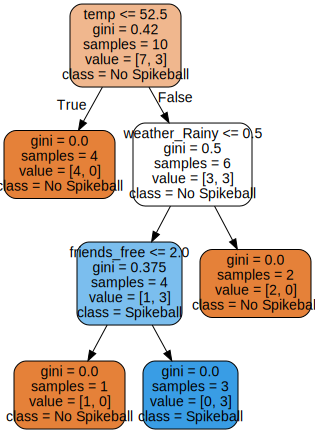

In [10]:
# Visualize the decision tree
from IPython.display import display, HTML
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(clf,
                        out_file=None,
                        feature_names=X_train.columns,
                        class_names=['No Spikeball', 'Spikeball'],
                        filled=True,
                        rounded=True))
graph

# Trying it out on real world data

We're going to use the same breast cancer dataset as before.

In [11]:
url = 'https://raw.githubusercontent.com/ishaandey/node/master/week-7/workshop/breast_cancer.csv'
df = pd.read_csv(url)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# Clean the data
df = df.drop(columns=['id','Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [13]:
# Divide into X and y and do train_test_split
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Fit a DecisionTreeClassifier to the data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predict on the testing data and compare the predicted to the actual
predicted = clf.predict(X_test)
actual = np.array(y_test)

print('Look at first 10 predictions:')
print('Predicted: ',predicted[:10])
print('Actual:    ',actual[:10])

Look at first 10 predictions:
Predicted:  [0 1 1 0 0 1 1 1 1 1]
Actual:     [0 1 1 0 0 1 1 1 0 0]


In [16]:
# Get the accuracy score
acc = accuracy_score(predicted, actual)
acc

0.9298245614035088

# Feature importances
The DecisionTreeClassifier weighs different features more heavily than other when making its predictions. Let's take a look at the most important features used in this classification.

In [17]:
# Get feature importances
pd.DataFrame({'Importance':clf.feature_importances_}, index=X.columns)

,Importance
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.006276
concavity_mean,0.000000
concave points_mean,0.691420
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


# Which depth?

Decision trees allow you to specify the depth that the tree is allowed to go to. Deeper trees are able to capture more details in the training set, but it may lead to overfitting. Find the accuracy of the decision tree with max depths of 1, 3, and 5.

In [18]:
# Fit a DecisionTreeClassifier with max_depth=1 and get the accuracy score
clf1 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf1.fit(X_train, y_train)
predicted = clf1.predict(X_test)
actual = np.array(y_test)
acc1 = accuracy_score(predicted, actual)
print(acc1)

0.8947368421052632


In [19]:
# Fit a DecisionTreeClassifier with max_depth=3 and get the accuracy score
clf3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf3.fit(X_train, y_train)
predicted = clf3.predict(X_test)
actual = np.array(y_test)
acc3 = accuracy_score(predicted, actual)
print(acc3)

0.9473684210526315


In [20]:
# Fit a DecisionTreeClassifier with max_depth=100 and get the accuracy score
clf100 = DecisionTreeClassifier(max_depth=100, random_state=42)
clf100.fit(X_train, y_train)
predicted = clf100.predict(X_test)
actual = np.array(y_test)
acc100 = accuracy_score(predicted, actual)
print(acc100)

0.9473684210526315


Let's take a look at what feature the max_depth=1 tree used.

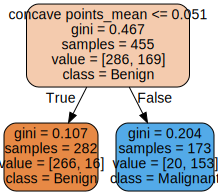

In [21]:
# Visualize max_depth=1 tree
graph = Source(export_graphviz(clf1,
                        out_file=None,
                        feature_names=X_train.columns,
                        class_names=['Benign', 'Malignant'],
                        filled=True,
                        rounded=True))
graph

This agrees with the feature importances. Cool!